In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f561f481995576cf9d34e4964f3bdeac7b8338a8039c08715df266235c3bdf73
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


7.202159494188379


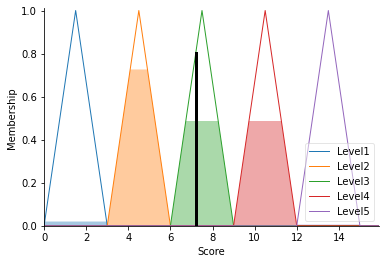

In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

taste = ctrl.Antecedent(np.arange(0,11,0.1),'Taste')
environment = ctrl.Antecedent(np.arange(0,11,0.1),'Environment')
budget = ctrl.Antecedent(np.arange(0,11,0.1),'Budget')
review = ctrl.Antecedent(np.arange(0,11,0.1),'Review')
location = ctrl.Antecedent(np.arange(0,11,0.1),'Location')
score = ctrl.Consequent(np.arange(0,16,0.1),'Score')

taste['Low']=fuzz.gaussmf(taste.universe,0,2.5)
taste['Medium']=fuzz.gaussmf(taste.universe,5,2.5)
taste['High']=fuzz.gaussmf(taste.universe,10,2.5)

environment['Low']=fuzz.gaussmf(environment.universe,0,2.5)
environment['Medium']=fuzz.gaussmf(environment.universe,5,2.5)
environment['High']=fuzz.gaussmf(environment.universe,10,2.5)

budget['Low']=fuzz.gaussmf(budget.universe,0,2.5)
budget['Medium']=fuzz.gaussmf(budget.universe,5,2.5)
budget['High']=fuzz.gaussmf(budget.universe,10,2.5)

review['Low']=fuzz.gaussmf(review.universe,0,2.5)
review['Medium']=fuzz.gaussmf(review.universe,5,2.5)
review['High']=fuzz.gaussmf(review.universe,10,2.5)

location['Low']=fuzz.gaussmf(location.universe,0,2.5)
location['Medium']=fuzz.gaussmf(location.universe,5,2.5)
location['High']=fuzz.gaussmf(location.universe,10,2.5)

score['Level1']=fuzz.trimf(score.universe,[0,1.5,3])
score['Level2']=fuzz.trimf(score.universe,[3,4.5,6])
score['Level3']=fuzz.trimf(score.universe,[6,7.5,9])
score['Level4']=fuzz.trimf(score.universe,[9,10.5,12])
score['Level5']=fuzz.trimf(score.universe,[12,13.5,15])

rule1=ctrl.Rule(taste['Low']&environment['Low']&budget['Low']&review['Low']&location['Low'],score['Level1'])
rule2=ctrl.Rule((taste['Low']|taste['Medium'])&(environment['Low']|environment['Medium'])&(budget['Low']|budget['Medium'])&(review['Low']|review['Medium'])&(location['Low']|location['Medium']),score['Level2'])
rule3=ctrl.Rule(taste['Medium']&environment['Medium']&budget['Medium']&review['Medium']&location['Medium'],score['Level3'])
rule4=ctrl.Rule((taste['High']|taste['Medium'])&(environment['High']|environment['Medium'])&(budget['High']|budget['Medium'])&(review['High']|review['Medium'])&(location['High']|location['Medium']),score['Level4'])
rule5=ctrl.Rule(taste['High']&environment['High']&budget['High']&review['High']&location['High'],score['Level5'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
computing = ctrl.ControlSystemSimulation(computing_ctrl)
computing.input['Taste'] = random.randint(7,11)
computing.input['Environment'] = random.randint(4,7)
computing.input['Budget'] = random.randint(4,7)
computing.input['Review'] = random.randint(7,11)
computing.input['Location'] = random.randint(1,4)

computing.compute()
print(computing.output['Score'])
score.view(sim=computing)